In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
numb_x_src_path = '../../Dataset/MixedDataSetAdded.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst2.xlsx'

In [3]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

FileNotFoundError: File ../../Dataset/MixedDataSetAdded.json does not exist

In [ ]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [ ]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [ ]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [ ]:
ros = SMOTE()
X_N_train, y_N_train = ros.fit_resample(X_N_train, y_N_train)
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [ ]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 1.0
Test data score: 0.9285714285714286


In [ ]:
NPH = 512

numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,1)),  # Input shape for LSTM layer should be (timesteps, features)
    keras.layers.LSTM(8, activation='tanh', return_sequences=True),
    keras.layers.LSTM(8, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()
LR = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=LR)

numb_model.compile(optimizer=optimizer, loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=100, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/100


6/6 [==============================] - 94s 15s/step - loss: 0.6982 - accuracy: 0.4521 - val_loss: 0.7223 - val_accuracy: 0.2500
Epoch 2/100
6/6 [==============================] - 95s 16s/step - loss: 0.6979 - accuracy: 0.5000 - val_loss: 0.7210 - val_accuracy: 0.2500
Epoch 3/100


In [ ]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")
# config = optimizer.get_config()

# # Extract and print the learning rate
# learning_rate = config['learning_rate']
# print("Default learning rate:", learning_rate)


In [ ]:
# for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
#     print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

In [ ]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 20ms/step - loss: 0.5041 - accuracy: 0.9286
0.9285714030265808


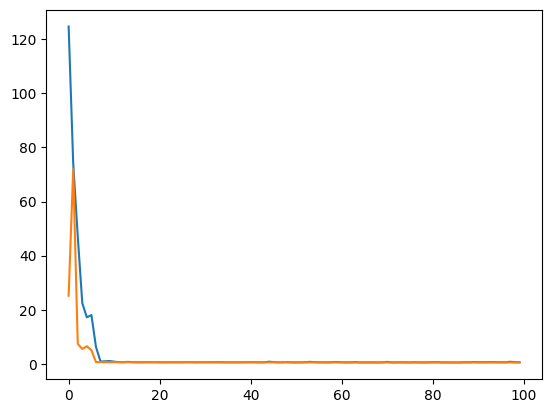

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

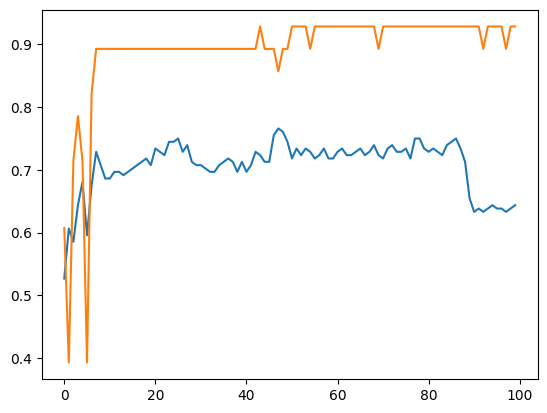

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])